# Import Libraries 

In [2]:
import numpy as np 
import pandas as pd
import statistics 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from statistics import *


# Read the dataset

In [3]:
multiplechoice = pd.read_csv('/Users/thiphan/Desktop/GitProject/Salary_Prediction/multipleChoiceResponses.csv')
multiplechoice

/Users/thiphan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
23856,131,Female,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),NaN,-1,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
23857,370,Male,-1,22-24,Turkey,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
23858,36,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [4]:
# Number of observations 
multiplechoice.shape[0]

23860

# analyzing and cleaning data

In [5]:
# what are the unique value in column Q9

print(multiplechoice['Q9'].unique())

['What is your current yearly compensation (approximate $USD)?' nan
 '10-20,000' '0-10,000'
 'I do not wish to disclose my approximate yearly compensation'
 '20-30,000' '125-150,000' '30-40,000' '50-60,000' '100-125,000'
 '90-100,000' '70-80,000' '80-90,000' '60-70,000' '400-500,000'
 '40-50,000' '150-200,000' '500,000+' '300-400,000' '200-250,000'
 '250-300,000']


In [6]:
# keep only numerical value

multiplechoice = multiplechoice[(multiplechoice['Q9'].notnull()) 
                & (multiplechoice['Q9']!='I do not wish to disclose my approximate yearly compensation'
)]
multiplechoice.shape[0]

15430

['What is your current yearly compensation (approximate $USD)?'
 '10-20,000' '0-10,000' '20-30,000' '125-150,000' '30-40,000' '50-60,000'
 '100-125,000' '90-100,000' '70-80,000' '80-90,000' '60-70,000'
 '400-500,000' '40-50,000' '150-200,000' '500,000+' '300-400,000'
 '200-250,000' '250-300,000']


Text(0.5, 1.0, 'Yearly Income')

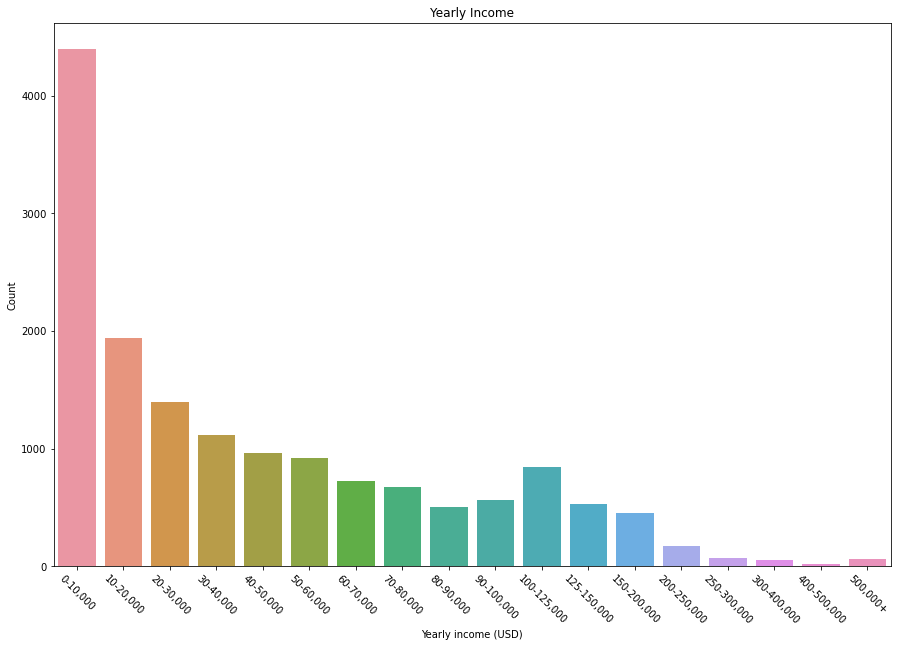

In [7]:
print(multiplechoice['Q9'].unique())
order = ['0-10,000', '10-20,000', '20-30,000', '30-40,000', '40-50,000', '50-60,000', '60-70,000', '70-80,000', '80-90,000', '90-100,000', '100-125,000', '125-150,000', '150-200,000', '200-250,000', '250-300,000', '300-400,000', '400-500,000', '500,000+']
plt.figure(figsize = (15,10))
sns.countplot(multiplechoice['Q9'], order = order)
plt.xticks(rotation = -45)
plt.xlabel("Yearly income (USD)")
plt.ylabel("Count")
plt.title("Yearly Income")

In [8]:
# subset dataframe, only Q1 and Q9 column

subset_income = multiplechoice[['Q1','Q9']][1:]
subset_income

,Q1,Q9
2,Male,"10-20,000"
3,Female,"0-10,000"
5,Male,"0-10,000"
7,Male,"10-20,000"
8,Male,"0-10,000"
...,...,...
23844,Male,"90-100,000"
23845,Male,"0-10,000"
23854,Male,"10-20,000"
23855,Male,"250-300,000"


In [9]:
# group by salary column

income = subset_income.groupby('Q9')
income

In [10]:
# group data on income

d1 = income.get_group('0-10,000')
d2 = income.get_group('10-20,000')
d3 = income.get_group('20-30,000')
d4 = income.get_group('30-40,000')
d5 = income.get_group('40-50,000')
d6 = income.get_group('50-60,000')
d7 = income.get_group('60-70,000')
d8 = income.get_group('70-80,000')
d9 = income.get_group('80-90,000')
d10 = income.get_group('90-100,000')
d11 = income.get_group('100-125,000')
d12 = income.get_group('125-150,000')
d13 = income.get_group('150-200,000')
d14 = income.get_group('200-250,000')
d15 = income.get_group('250-300,000')
d16 = income.get_group('300-400,000')
d17 = income.get_group('300-400,000')
d18 = income.get_group('500,000+')

In [11]:
# combine all income data to 1 dataframe

data = pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18])
income_data = data.groupby('Q1')['Q9']

# group by male and female
male = income_data.get_group('Male')
print(male)
female = income_data.get_group('Female')
print(female)

5        0-10,000
8        0-10,000
18       0-10,000
26       0-10,000
27       0-10,000
           ...   
20051    500,000+
20875    500,000+
21122    500,000+
22264    500,000+
23098    500,000+
Name: Q9, Length: 12888, dtype: object
3        0-10,000
24       0-10,000
102      0-10,000
138      0-10,000
171      0-10,000
           ...   
15825    500,000+
18120    500,000+
19506    500,000+
22591    500,000+
23627    500,000+
Name: Q9, Length: 2384, dtype: object


In [12]:
# treat index as column
male_income = male.reset_index()
male_income_data = male_income['Q9']
male_median = int((len(male_income_data)+1)/2)
median_income_male = male_income_data.iloc[male_median]
print("Median income of male employees: ", median_income_male)

Median income of male employees:  30-40,000


In [13]:
female_income = female.reset_index()
female_income_data = female_income['Q9']
female_median = int((len(female_income_data)+1)/2)
median_income_female = female_income_data.iloc[female_median]
print("Median income of female employees: ", median_income_female)

Median income of female employees:  20-30,000


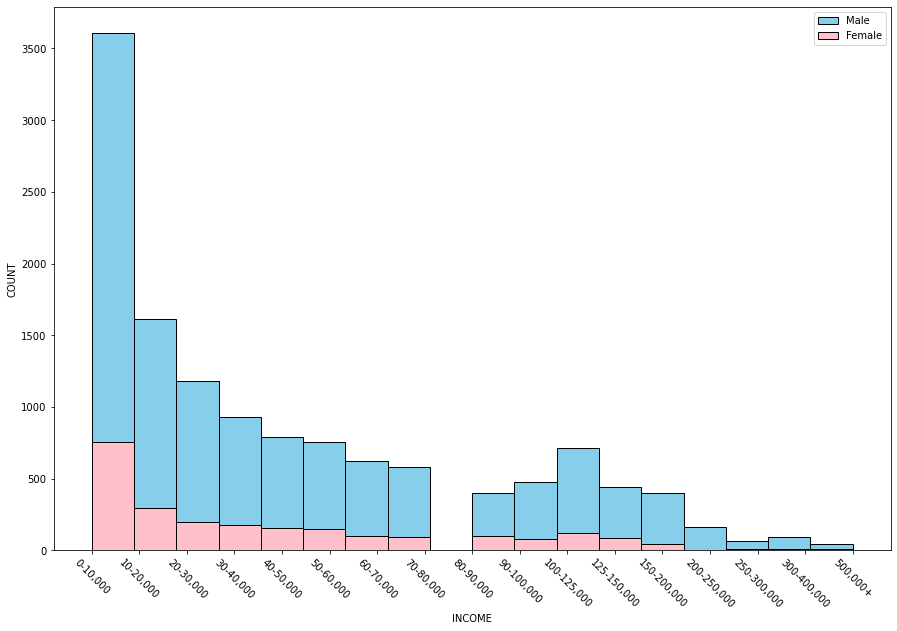

In [14]:
# histogram of income of female and male

#matplotlib.use('TKAgg',warn=False, force=True)

plt.figure(figsize=(15,10))
plt.hist(male, bins=18, color = 'skyblue', edgecolor = 'black', label = 'Male')
plt.hist(female, bins=18, color = 'pink', edgecolor = 'black', label = 'Female')
plt.xticks(rotation = -45)
plt.legend(loc = 'upper right')
plt.xlabel('INCOME')
plt.ylabel('COUNT')
plt.show()


# 500 employess selected to make new dataset

In [16]:
male = subset_income[subset_income['Q1']== 'Male'].index
male_sampling = np.random.choice(male,250,replace = False)
male_value = subset_income.loc[male_sampling]

female = subset_income[subset_income['Q1']== 'Female'].index
female_sampling = np.random.choice(female,250,replace = False)
female_value = subset_income.loc[female_sampling]

print(male_value)
print(female_value)

         Q1           Q9
19688  Male    80-90,000
19296  Male     0-10,000
13285  Male    30-40,000
4680   Male    80-90,000
23823  Male     0-10,000
...     ...          ...
17401  Male  300-400,000
16674  Male     0-10,000
5835   Male    60-70,000
10019  Male    60-70,000
201    Male    20-30,000

[250 rows x 2 columns]
           Q1           Q9
15118  Female   90-100,000
9932   Female    60-70,000
2359   Female    40-50,000
1817   Female    20-30,000
20503  Female     0-10,000
...       ...          ...
1121   Female    10-20,000
7918   Female    20-30,000
17768  Female    80-90,000
22147  Female    10-20,000
2679   Female  100-125,000

[250 rows x 2 columns]


# Draw the income histogram and display the median income for male and female 

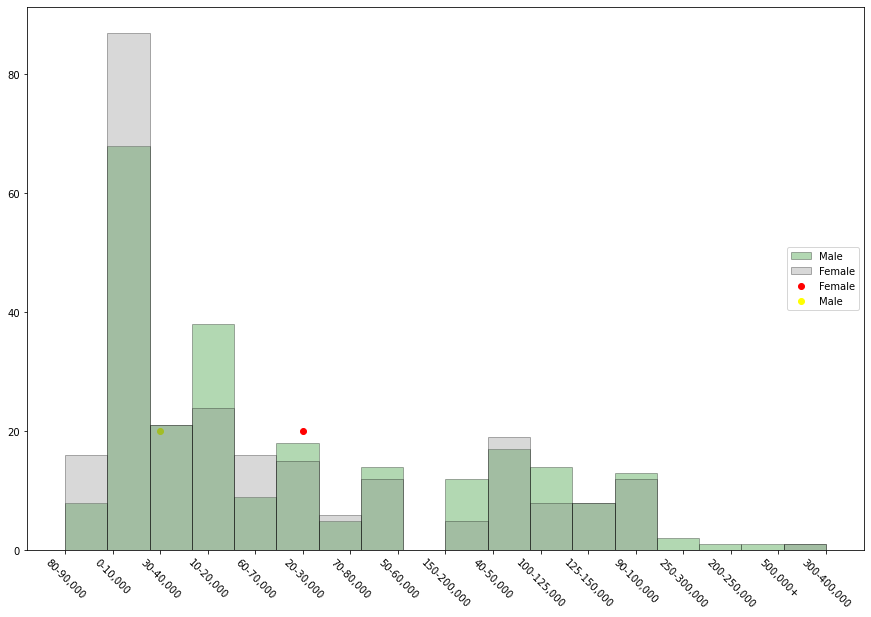

In [17]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = -45)
plt.hist(male_value['Q9'], bins = 18, alpha = 0.3, color = 'green', edgecolor = 'black', label = 'Male')
plt.hist(female_value['Q9'], bins = 18, alpha = 0.3, color = 'grey', edgecolor = 'black', label = 'Female')
plt.legend(loc = 'upper right')
plt.scatter(median_income_female, 20, color = 'red', label = 'Female')
plt.scatter(median_income_male, 20, color = 'yellow', label = 'Male')
plt.legend(loc = 'center right')
plt.show()

# draw the histogram of test statistic and draw red dot to show the difference of the median incomes between female and male employees 

NameError: name 'Median_diff_Male_Female' is not defined

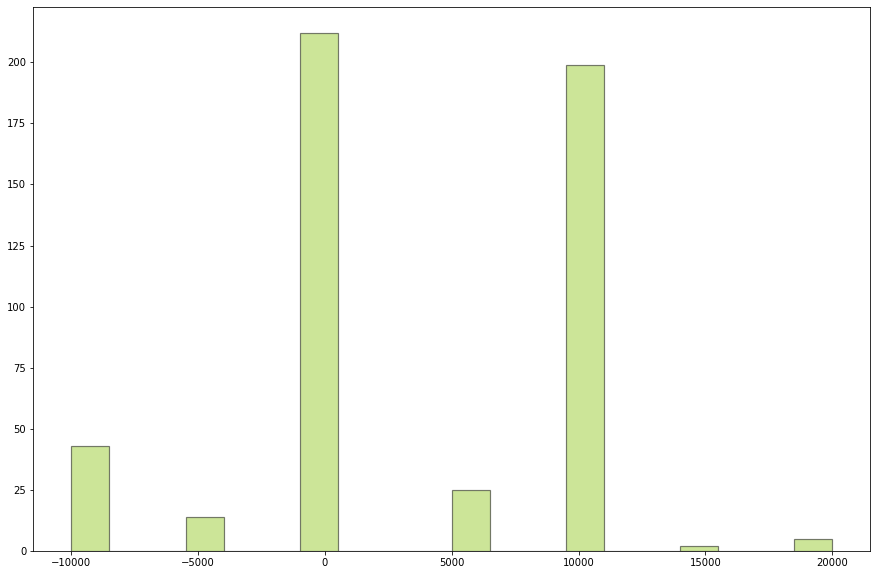

In [18]:
values = {'0-10,000': 5000, '10-20,000': 15000, '20-30,000': 25000, '30-40,000': 35000,'40-50,000': 45000, '50-60,000': 55000, '60-70,000': 65000, '70-80,000': 75000,'80-90,000': 85000, '90-100,000': 95000, '100-125,000': 112500,
       '125-150,000': 137500, '150-200,000': 175000, '200-250,000': 225000,
       '250-300,000': 275000, '300-400,000': 350000, '400-500,000': 450000,
       '500,000+':500000,'500,000':500000}

# Average calculation for approximation Salaries
subset_income['salary'] = subset_income['Q9'].apply(lambda value: values[value]) 

arrays = []
for i in range(500):
    
    # Median for male 
    mi = subset_income[subset_income['Q1']=='Male'].index 
    ms = np.random.choice(mi,250,replace=False)
    fmale = subset_income.loc[ms]
    male_data = fmale['salary'].median() 
    
    # median for female
    fi = subset_income[subset_income['Q1'] == 'Female'].index
    fs = np.random.choice(fi,250,replace=False)
    ffemale=subset_income.loc[fs]
    female_data=ffemale['salary'].median() 
    
    # append to array by subtract the median between male and female
    arrays.append(male_data - female_data)

mf = subset_income.groupby('Q1')
mm = mf.get_group('Male')['salary'].median()
fm = mf.get_group('Female')['salary'].median()

# the difference of the median incomes between female and male employees
median_diff = male_median - female_median 

plt.figure(figsize = (15,10))
# histogram for 500 samples of Median salries of Male and Female 
plt.hist(arrays, bins = 20, alpha = 0.5, color = 'yellowgreen', edgecolor = 'black', linewidth = 1.2, label = 'Median Salary Differences') 

# plot dot for median difference of male and female
plt.scatter(Median_diff_Male_Female, 20, color = 'red', label = 'Median') 
plt.legend()
print(f"The Median Salary differences of Males and females is {median_diff}")

# use bootstrap to procedure at leat 5000 samples and draw histogram of the test statistic

The Mean of original data is between 4024.3494785115577 and 10566.61728754855


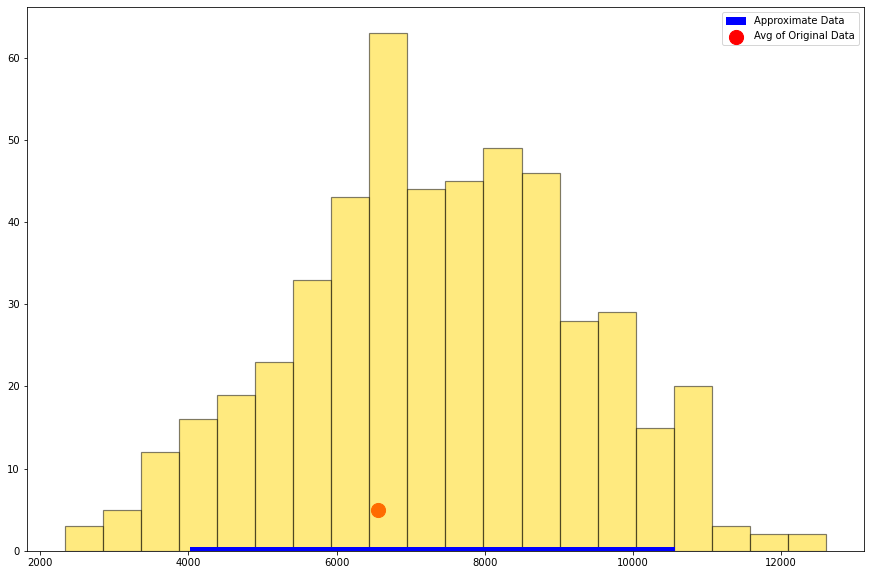

In [19]:
arrays = []
# generate 5000 resamples randomly from Dataset without replacement
sample_data = subset_income.sample(5000,replace = False) 
sample_data = sample_data[['Q1','salary']]

for temp in range(500):
    # random samples of 5000 with replacment
    bootstrap_sample = sample_data.sample(5000,replace = True) 
    bootstrap_sample_groupby = bootstrap_sample.groupby('Q1')
    
    # average male and female income
    bootstrap_male_mean = bootstrap_sample_groupby.get_group('Male')['salary'].mean() 
    bootstrap_female_mean = bootstrap_sample_groupby.get_group('Female')['salary'].mean()
    
    # append to array by subtract average income 
    arrays.append(bootstrap_male_mean - bootstrap_female_mean)

# create bootstrap dataset from array 
bootstrap_df = pd.DataFrame(arrays,columns = ['Bootstrap_values']) 

# 5 % data in normal distribution
firstextreme = bootstrap_df.Bootstrap_values.quantile(0.050) 

#95 % of data in normal distribution
lastextreme = bootstrap_df.Bootstrap_values.quantile(0.950) 

print(f"The Mean of original data is between {firstextreme} and {lastextreme}")

male_avg = mf.get_group('Male')['salary'].mean() # Male average of original population
female_avg = mf.get_group('Female')['salary'].mean() #Female average of original population

# difference of average income
avg_diff = male_avg - female_avg 

plt.figure(figsize = (15,10))
# histogram for Bootstarp samples
plt.hist(arrays, bins = 20, alpha = 0.5, color = 'gold', edgecolor = 'black', linewidth = 1.2) 

# line that shows the approxiamte data around the mean
plt.hlines((0,0), firstextreme, lastextreme, colors = 'blue', linestyles = 'solid', linewidth = 8, label = 'Approximate Data') 

# plot Dot of original mean
plt.scatter(avg_diff, 5, color = 'red', s = 200,label  ='Avg of Original Data') 
plt.legend()
plt.show()

P value is 0.44144144144144143


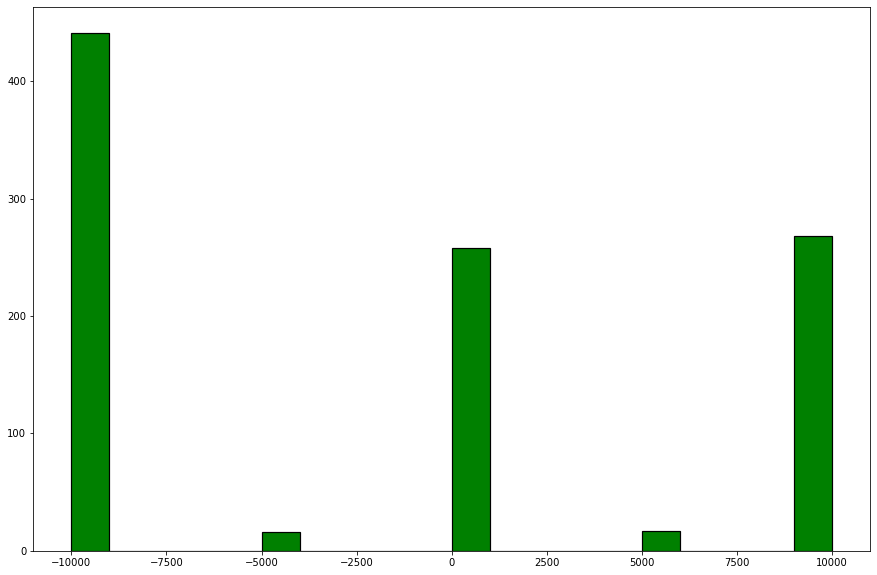

In [20]:
i_md = []
p = subset_income[['Q1','salary']]

for i in range(1000):
  i_d = p.sample(len(p),replace = False)['Q1'].reset_index()['Q1']
  data = {'Q1data':i_d}
  now = pd.DataFrame(data)
  a1 = p['Q1'].reset_index()['Q1']
  a2 = p['salary'].reset_index()['salary']
  now['salary']=a2
  now['now_gender']=a1
  i_g = now.groupby('Q1data')
  i_m = i_g.get_group('Male')['salary'].median() #Male Median value for shuffles data
  i_f = i_g.get_group('Female')['salary'].median()
  i_md.append(i_m - i_f) #Difference of Male and Female resampled median

mf = subset_income.groupby('Q1')
mm = mf.get_group('Male')['salary'].median() #Male median of original data
fm = mf.get_group('Female')['salary'].mean() 
mfmd = mm - fm #Difference of male median and female median

plt.figure(figsize = (15,10))
plt.hist(i_md, bins = 20, color = 'green', edgecolor = 'black', linewidth = 1.2)

i_md = np.array(i_md)
P1 = np.count_nonzero(i_md <= mfmd) / i #Storing P value
print(f"P value is {P1}")
